In [1]:
from pathlib import Path
import sys

# Go 4 levels up to reach topquartile module from the notebook
root = Path().resolve().parents[2]

# Add it to the top of sys.path
if str(root) not in sys.path:
    sys.path.insert(0, str(root))

print("✅ Project root added to sys.path:", root)

✅ Project root added to sys.path: /Users/admin/RR_Project_Regime_Prediction/topquartile


In [2]:
import pandas as pd
from topquartile.modules.datamodule.transforms.label import KMRFLabelTransform
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("/Users/admin/Desktop/spx_data.csv", header=[0, 1], index_col=0, parse_dates=True)

In [4]:
print("Columns:", df.columns)

Columns: MultiIndex([( 'Close', '^SPX'),
            (  'High', '^SPX'),
            (   'Low', '^SPX'),
            (  'Open', '^SPX'),
            ('Volume', '^SPX')],
           names=['Price', 'Ticker'])


In [5]:
df.columns = [f"{col[0]}_{col[1]}" for col in df.columns]

In [6]:
df = df.rename(columns={"Close_^SPX": "PX_LAST"})

In [7]:
print("Columns:", df.columns)

Columns: Index(['PX_LAST', 'High_^SPX', 'Low_^SPX', 'Open_^SPX', 'Volume_^SPX'], dtype='object')


In [8]:
labeler = KMRFLabelTransform(price_column="PX_LAST", kama_n=10, gamma=0.4)
df_with_labels = labeler.transform(df)
df_with_labels["regime_label"].value_counts()
df_with_labels["regime_label_raw"].value_counts()

/Users/admin/.pyenv/versions/topquartile-3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Raw regime counts:
 1.0    1450
2.0     451
3.0     343
0.0     261
NaN      11
Name: count, dtype: int64


regime_label_raw
1.0    1450
2.0     451
3.0     343
0.0     261
Name: count, dtype: int64

In [9]:
df_with_labels[["PX_LAST", "regime_label"]].tail(30)

,PX_LAST,regime_label
Date,,
2024-11-18,5893.620117,-1.0
2024-11-19,5916.979980,-1.0
2024-11-20,5917.109863,-1.0
2024-11-21,5948.709961,-1.0
2024-11-22,5969.339844,-1.0
2024-11-25,5987.370117,-1.0
2024-11-26,6021.629883,-1.0
2024-11-27,5998.740234,-1.0
2024-11-29,6032.379883,-1.0


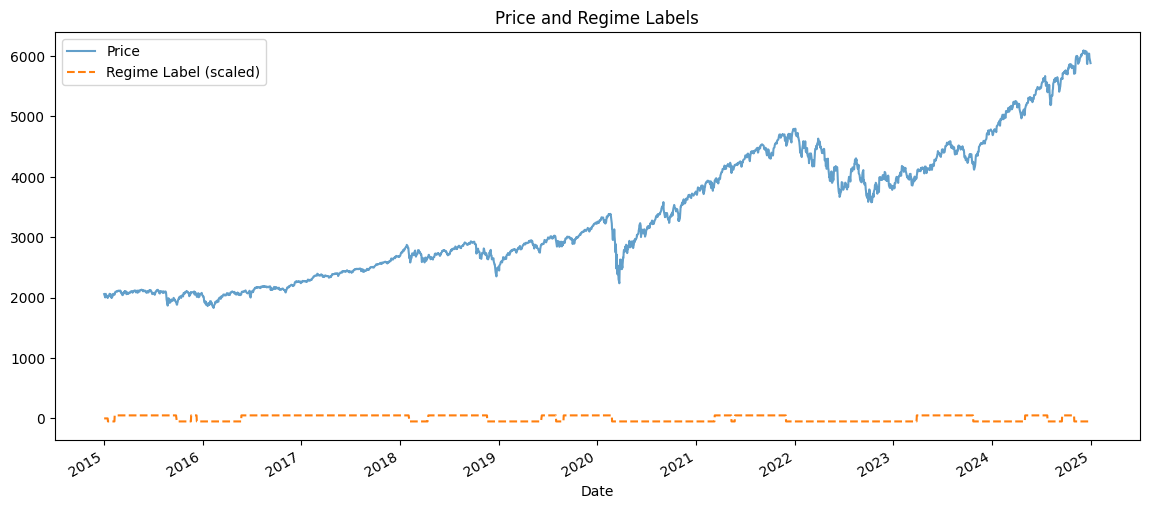

In [10]:
plt.figure(figsize=(14, 6))
df_with_labels["PX_LAST"].plot(label="Price", alpha=0.7)
df_with_labels["regime_label"].mul(50).plot(label="Regime Label (scaled)", linestyle='--')
plt.title("Price and Regime Labels")
plt.legend()
plt.show()

In [11]:
df_with_labels["regime_label"].value_counts(dropna=False)

regime_label
 1.0    1320
-1.0    1186
 0.0      10
Name: count, dtype: int64

<Axes: title={'center': 'Buy & Hold vs KMRF Strategy'}, xlabel='Date'>

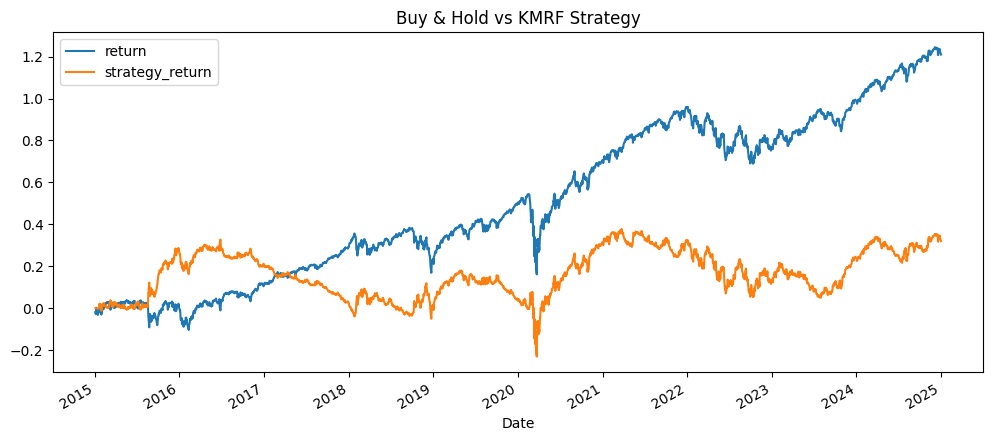

In [12]:
df_with_labels["signal"] = df_with_labels["regime_label"].shift(1) * -1
df_with_labels["return"] = df_with_labels["PX_LAST"].pct_change()
df_with_labels["strategy_return"] = df_with_labels["signal"] * df_with_labels["return"]
df_with_labels[["return", "strategy_return"]].cumsum().plot(figsize=(12, 5), title="Buy & Hold vs KMRF Strategy")

<Axes: xlabel='Date'>

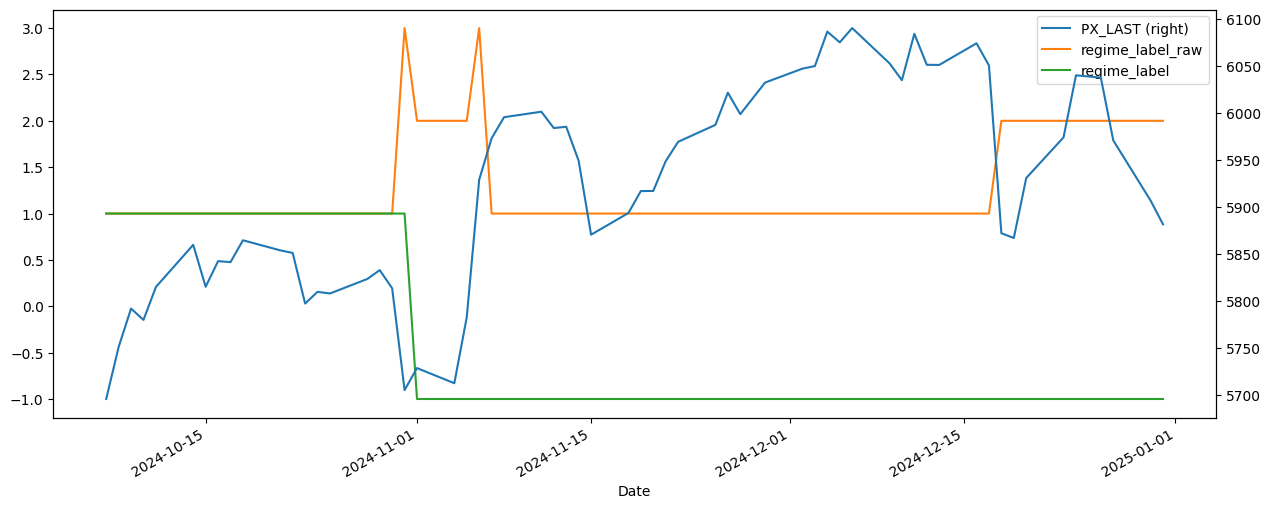

In [13]:
df_with_labels[["PX_LAST", "regime_label_raw", "regime_label"]].tail(60).plot(secondary_y="PX_LAST", figsize=(15, 6))